<a href="https://colab.research.google.com/github/Olimpiamachado/AI_Olimpia/blob/main/Olimpia_Machado_E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Práctica: Análisis e Interpretación de Datos con Python**
Objetivo:

Aplicar técnicas de análisis exploratorio, estadística descriptiva, distribuciones de probabilidad, clustering y reducción de dimensionalidad para extraer información útil de un conjunto de datos real.




*  Requisitos Previos: Uso de Python y librerías: pandas, numpy, matplotlib, seaborn, scipy.stats,sklearn.
*  Familiaridad con manipulación de datos, estadística básica y machine learning.
* Entorno recomendado: Anaconda y Jupyter Notebooks.
* Conjunto de Datos: Usaremos el dataset penguins de la librería seaborn, que contiene características de tres especies de pingüinos.
**Columnas principales:**
- species: Especie del pingüino.
- bill_length_mm, bill_depth_mm: Longitud y profundidad del pico en mm.
- flipper_length_mm: Longitud de las aletas en mm.
- body_mass_g: Masa corporal en gramos.
- island: Isla de origen.
- sex: Sexo del pingüino.

# Ejercicio 1: Análisis Exploratorio y Estadísticos Básicos
Instrucciones:
1. Carga el conjunto de datos y visualiza las primeras filas.
2. Identifica los valores nulos y decide cómo imputarlos adecuadamente.
3. Calcula los estadísticos básicos (media, mediana, desviación estándar, percentiles) para las variables numéricas.
4. Visualiza la distribución de la masa corporal (body_mass_g) diferenciando entre especies usando un gráfico adecuado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [ ]:
#1. Carga del conjunto de datos
penguins = sns.load_dataset("penguins")
penguins.head() #Visualiza las primeras lineas

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
#2. identifica los valores nulos
penguins.info()
print('Valores nulos antes de imputar:')
print (penguins.isnull().sum())
#Tenemos valores nulos numéricos en [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g ] y no numericos en [Sex]

#Para imputar los valores numéricos rellenamos los huecos con el valor promedio:
imputer = SimpleImputer(strategy = 'mean')
col_numericas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins[col_numericas] = imputer.fit_transform(penguins[col_numericas])

#Para imputar los valores no numéricos rellenamos los nulos con el valor más frecuente:
imputer = SimpleImputer(strategy = 'most_frequent')
col_no_numericas = ['sex']
penguins[col_no_numericas] = imputer.fit_transform(penguins[col_no_numericas])
print('Valores nulos después de imputar :')
print (penguins.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
Valores nulos antes de imputar:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Valores nulos después de imputar :
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dt

In [ ]:
#3. Cálculo de las estadísticas básicas:
penguins.describe()
#Nos da la media, desv.típica, valores mínimos y máximos y percentiles para las variables numéricas.

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='body_mass_g', ylabel='Count'>

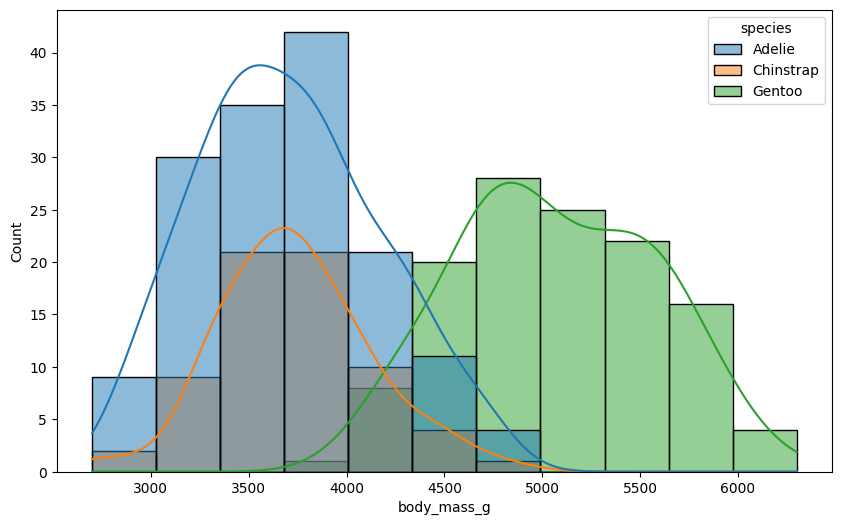

In [ ]:
#4. Visualiza la distribución de la masa corporal (body_mass_g) diferenciando entre especies usando un gráfico adecuado.
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='body_mass_g', hue='species', kde=True)

# Ejercicio 2: Distribuciones de Probabilidad
Instrucciones:
1. Ajusta una distribución normal a la variable body_mass_g para cada especie.
2. Realiza un test de normalidad (como Shapiro-Wilk) para verificar si los datos siguen una distribución normal.
3. Grafica la distribución de los datos junto con la curva de la distribución normal ajustada.

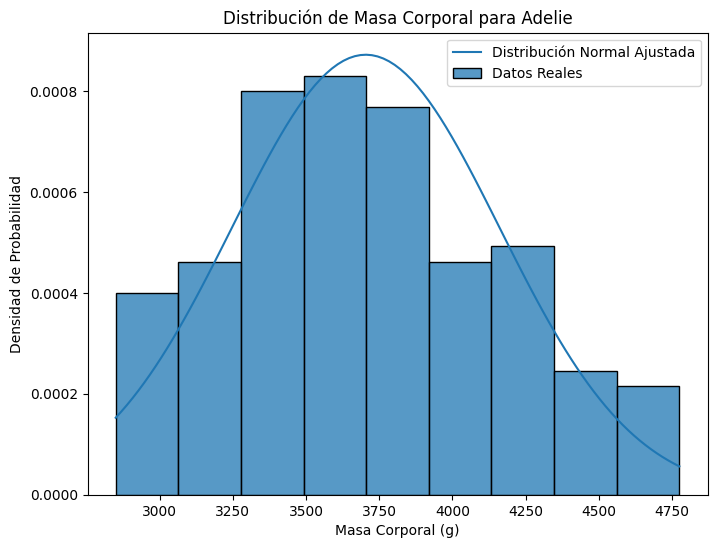

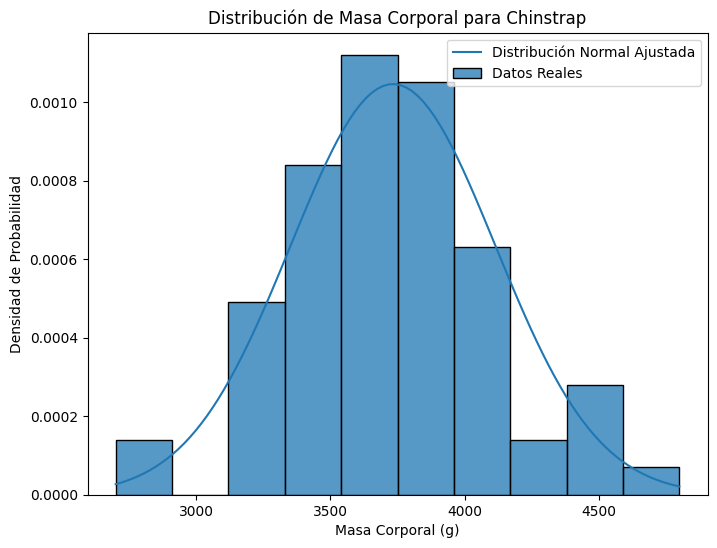

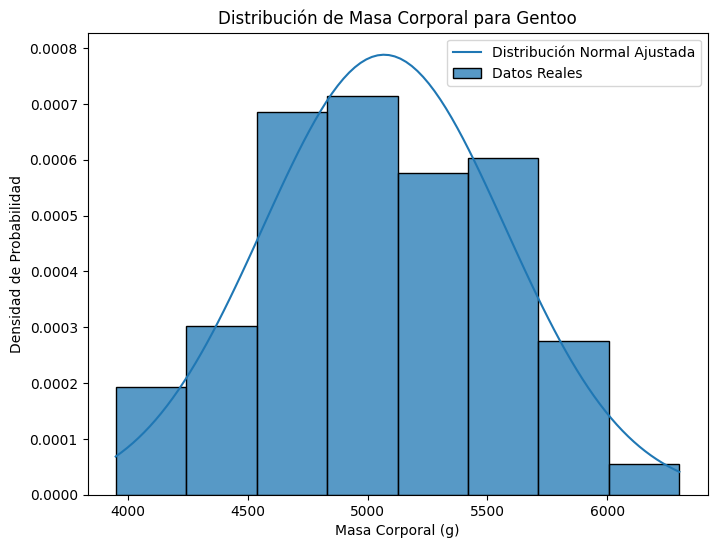

In [ ]:
#1 Ajusta una distribución normal a la variable body_mass_g para cada especie.
for especie in penguins['species'].unique():
    data = penguins[penguins['species'] == especie]['body_mass_g']
    mean, std = norm.fit(data)

    #Grafico de la distribución de los datos:
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=False, stat ='density', label=f'Datos Reales')
    x = np.linspace(data.min(), data.max(), 100)

    #gráfico de la curva de distribución normal
    plt.plot(x, norm.pdf(x, mean, std), label='Distribución Normal Ajustada')

    plt.title(f'Distribución de Masa Corporal para {especie}')
    plt.xlabel('Masa Corporal (g)')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.show()

In [ ]:
#Prueba de normalidad
for especie in penguins['species'].unique():
  stat, p = shapiro(data)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  print(f'{especie}- Estadística de Shaphiro: {stat}, p-valor: {p}')

Statistics=0.985, p=0.201
Adelie- Estadística de Shaphiro: 0.9853114269081487, p-valor: 0.20077040978681737
Statistics=0.985, p=0.201
Chinstrap- Estadística de Shaphiro: 0.9853114269081487, p-valor: 0.20077040978681737
Statistics=0.985, p=0.201
Gentoo- Estadística de Shaphiro: 0.9853114269081487, p-valor: 0.20077040978681737


# Ejercicio 3: Clustering con K-Means
Instrucciones:
1. Selecciona las variables bill_length_mm y bill_depth_mm para realizar el clustering.
2. Aplica el algoritmo K-Means con 3 clusters.
3. Agrega la información de los clusters al DataFrame.
4. Visualiza los clusters obtenidos usando un gráfico de dispersión e identifica los centroides.

  species     island  bill_length_mm  ...  body_mass_g     sex  cluster
0  Adelie  Torgersen        39.10000  ...  3750.000000    Male        0
1  Adelie  Torgersen        39.50000  ...  3800.000000  Female        0
2  Adelie  Torgersen        40.30000  ...  3250.000000  Female        0
3  Adelie  Torgersen        43.92193  ...  4201.754386    Male        2
4  Adelie  Torgersen        36.70000  ...  3450.000000  Female        0

[5 rows x 8 columns]


Text(0, 0.5, 'Profundidad del pico')

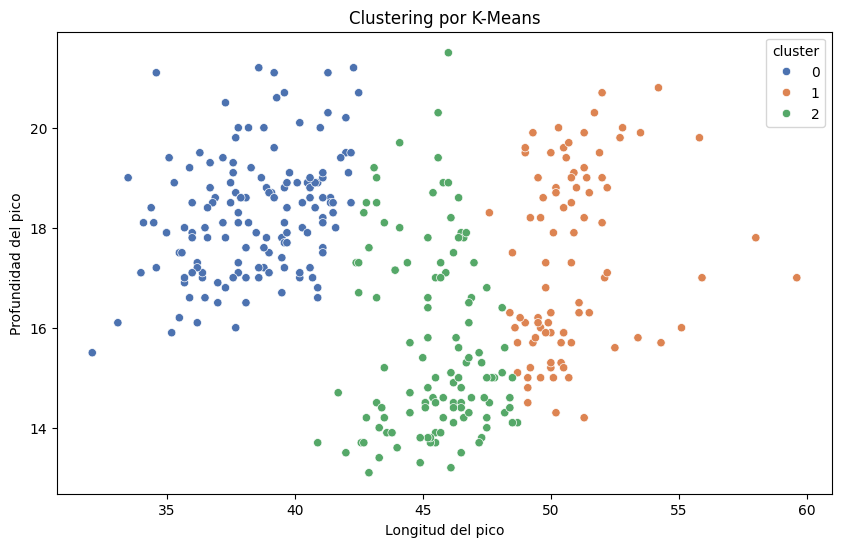

In [ ]:
#1. Selecciona las variables bill_length_mm y bill_depth_mm para realizar el clustering.
X = penguins[['bill_length_mm', 'bill_depth_mm']]
#2. Aplica el algoritmo K-Means con 3 clusters.
kmeans = KMeans(n_clusters=3, random_state=42)

#3. Agrega la información de los clusters al DataFrame.
penguins['cluster'] = kmeans.fit_predict(X)
print(penguins.head())

#4. Visualiza los clusters obtenidos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='deep')
plt.title('Clustering por K-Means')
plt.xlabel('Longitud del pico')
plt.ylabel('Profundidad del pico')

# Ejercicio 4: Reducción de Dimensionalidad con PCA
Instrucciones:
1. Selecciona las variables numéricas del dataset y elimina las no numéricas.
2. Aplica PCA para reducir la dimensionalidad a 2 componentes principales.
3. Transforma los datos usando PCA y crea un nuevo DataFrame con las componentes principales.
4. Grafica los datos transformados, coloreando por especie.

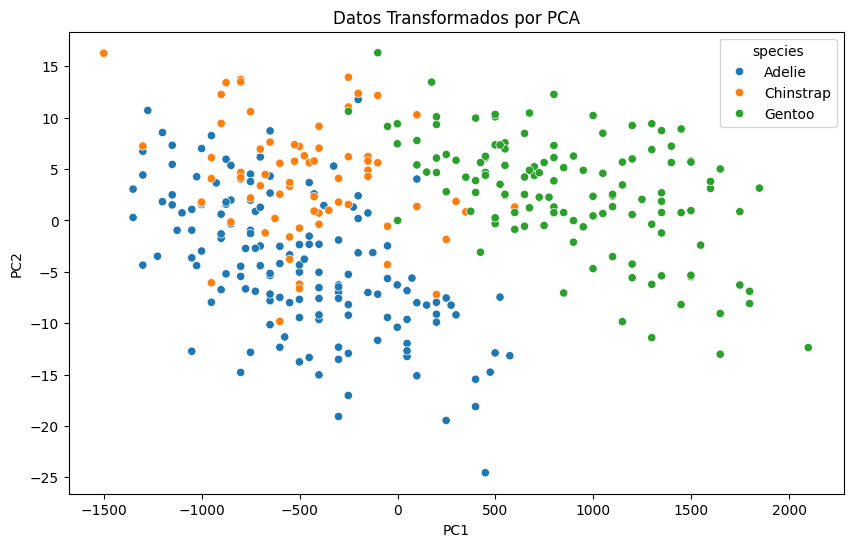

In [ ]:
# 1. Selecciona las variables numéricas del dataset y elimina las no numéricas.
numeric_columns = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']
X_nums = penguins[numeric_columns].dropna()

#2. Aplica PCA para reducir la dimensionalidad a 2 componentes principales.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_nums)

#3. crea un nuevo DataFrame con las componentes principales.

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = penguins.dropna(subset = numeric_columns)['species'].values

#4. Grafica los datos transformados, coloreando por especie.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species')
plt.title('Datos Transformados por PCA')
plt.show()